#**SUMMARY**

Filename    : dataPreparation.ipynb   
Description : The file contains logic for preparing the train and test datasets

Below steps were performed for data preparation,   
      1.   Using sklearn.model_selection - train_test_split function split the result dataframe into 80-20.  
      2.   Analyse the trin and test dataframe  
      3.   Balance out the Train dataframe based on the dataframe classes.  
      4.   Extract the final train and test dataframe into pickle files.


**Revision History**  
Date        ||       Description               ||              Author  
03-06-2020   ||   Initial logic for data preparation   ||   Arvindh   
  



#**Import Libraries**

In [0]:
%tensorflow_version 2.x

In [2]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [3]:
import pandas as pd 
import numpy as np
from seaborn import countplot
from matplotlib.pyplot import figure, show
import os

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Set your project path 
project_path =  'drive/My Drive/Colab Notebooks/Capstone'

#**Import Tain Class dataframe from the pickle file**

In [0]:
import pickle

file_Name = "/train_class_df_pickle"

In [7]:
# we open the file for reading
fileObject = open(project_path+file_Name,'rb')  
# load the object from the file into temp var b
train_class_df_pick = pickle.load(fileObject)  
train_class_df_pick.head(5)

,patientId,x,y,width,height,Target,class,PatientAge,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,51,F,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,48,F,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,19,M,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,28,M,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,32,F,AP


In [9]:
train_class_df_pick.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37627
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     30227 non-null  object 
 1   x             9555 non-null   float64
 2   y             9555 non-null   float64
 3   width         9555 non-null   float64
 4   height        9555 non-null   float64
 5   Target        30227 non-null  int64  
 6   class         30227 non-null  object 
 7   PatientAge    30227 non-null  object 
 8   PatientSex    30227 non-null  object 
 9   ViewPosition  30227 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.5+ MB


#**Train & Test Split**

In [10]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_class_df_pick, test_size=0.20,
                                    stratify=train_class_df_pick['class'])
print(train_df.shape, 'training data')
print(valid_df.shape, 'validation data')

(24181, 10) training data
(6046, 10) validation data


Note: The final dataframe  with 30227 rows from the EDA has been used for spliting the train and test dataframes in the ratio of 80:20 based on the property 'class'.

**Training dataframe has 24181 rows of data.**   
**Validation dataframe has 6046 rows of data.**  

# Lets check the distribution of 'Target' property over the 'class' property in both train and validation dataframes.

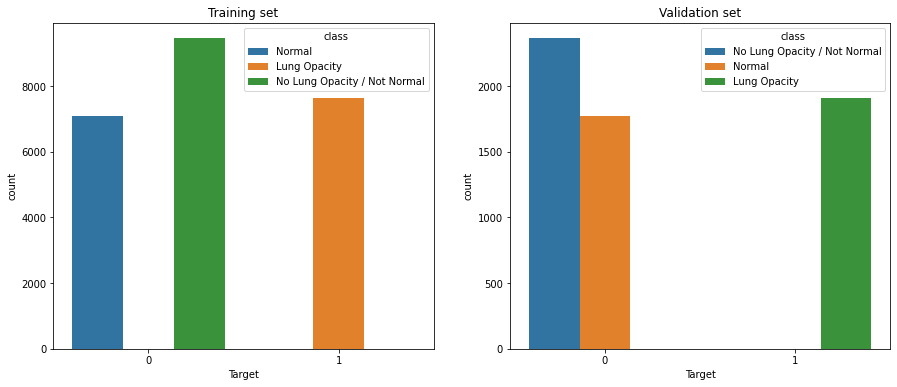

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
ax1.set_title("Training set")
ax2.set_title("Validation set")
countplot(data=train_df,x="Target", hue="class", ax= ax1)
countplot(data=valid_df,x="Target", hue="class", ax= ax2)
show()

# Lets check the distribution of 'PatientSex' property over the 'class' property in both train and validation dataframes.

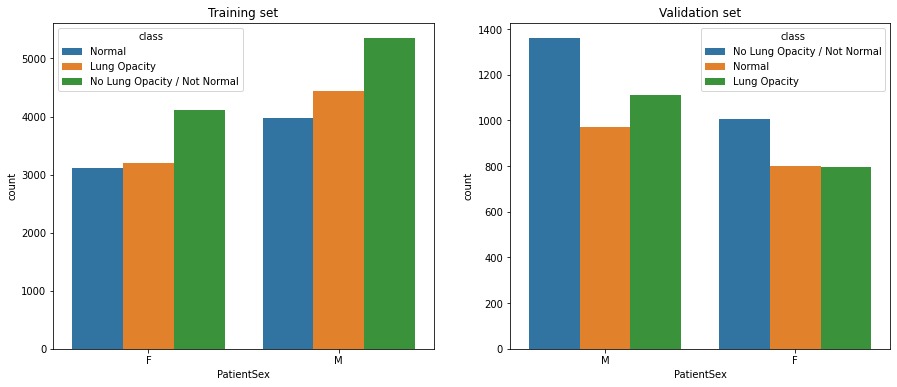

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
ax1.set_title("Training set")
ax2.set_title("Validation set")
countplot(data=train_df,x="PatientSex", hue="class", ax= ax1)
countplot(data=valid_df,x="PatientSex", hue="class", ax= ax2)
show()

Note: The result of two countplots describes that there is unbalanced data with respect to the corresponding categories.

#**Balance the data samples in training dataframe**

In [0]:
TEST_SAMPLES = 21000

Note: the test samples are considered as 21000, because 7000 data samples can be retrieved from each 'class' property

21000 new training size


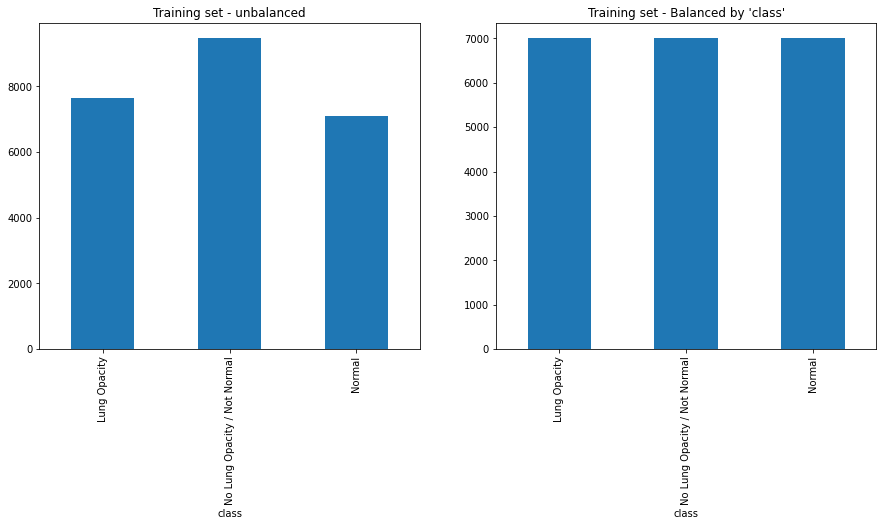

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
ax1.set_title("Training set - unbalanced")
ax2.set_title("Training set - Balanced by 'class'")
train_df.groupby('class').size().plot.bar(ax=ax1)
bal_train_df = train_df.groupby('class').\
    apply(lambda x: x.sample(TEST_SAMPLES//3)).\
    reset_index(drop=True)
bal_train_df.groupby('class').size().plot.bar(ax=ax2) 
print(bal_train_df.shape[0], 'new training size')

Lets check the stats for the first balanced dataframe 

In [29]:
bal_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     21000 non-null  object 
 1   x             7000 non-null   float64
 2   y             7000 non-null   float64
 3   width         7000 non-null   float64
 4   height        7000 non-null   float64
 5   Target        21000 non-null  int64  
 6   class         21000 non-null  object 
 7   PatientAge    21000 non-null  object 
 8   PatientSex    21000 non-null  object 
 9   ViewPosition  21000 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.6+ MB


# Lets check the distribution of 'PatientSex' property over the 'class' property in first balanced dataframe.

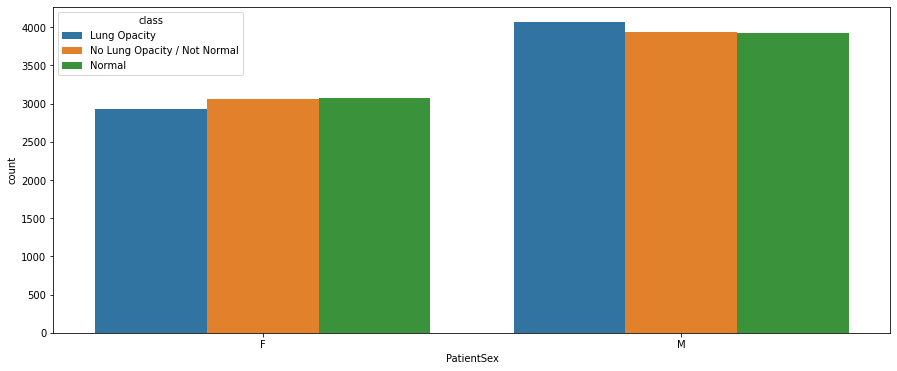

In [14]:
figure(figsize = (15, 6))
countplot(data=bal_train_df,x="PatientSex", hue="class")
show()

#**Balance the data samples in balanced dataframe**

In [0]:
TEST_SAMPLES1 = 18000

Note: the test samples are considered as 18000, because 9000 data samples can be retrieved from each 'PatientSex' property

18000 new training size


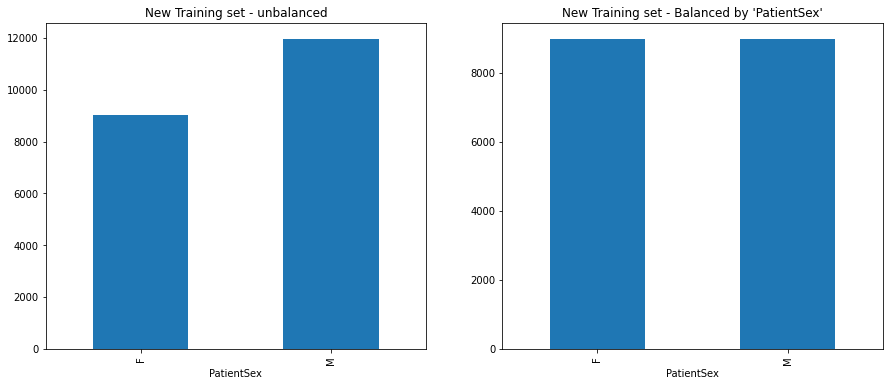

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
ax1.set_title("New Training set - unbalanced")
ax2.set_title("New Training set - Balanced by 'PatientSex'")
bal_train_df.groupby('PatientSex').size().plot.bar(ax=ax1)
bal_train_df_2 = bal_train_df.groupby('PatientSex').\
    apply(lambda x: x.sample(TEST_SAMPLES1//2)).\
    reset_index(drop=True)
bal_train_df_2.groupby('PatientSex').size().plot.bar(ax=ax2) 
print(bal_train_df_2.shape[0], 'new training size')

Lets check the distribution from the second balanced dataframe.

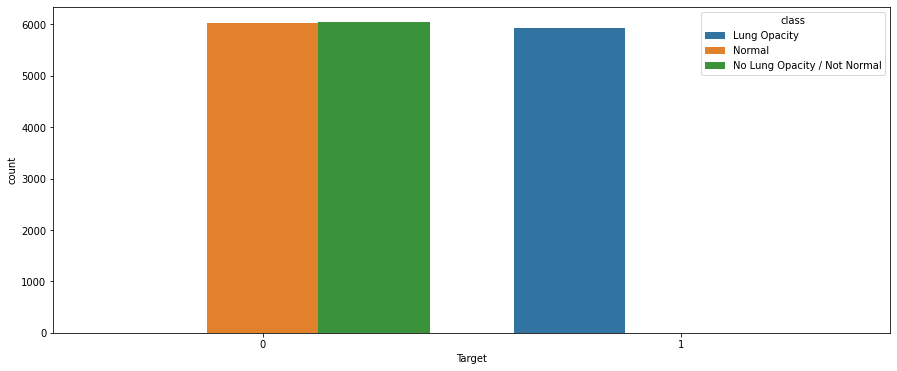

In [16]:
figure(figsize = (15, 6))
countplot(data=bal_train_df_2,x="Target", hue="class")
show()

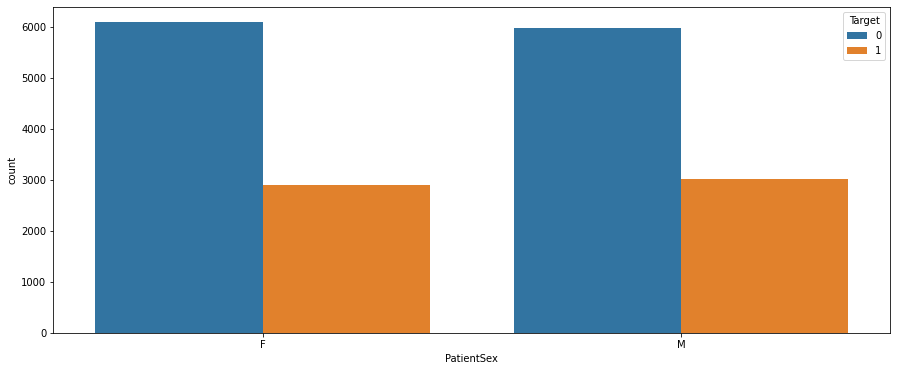

In [17]:
figure(figsize = (15, 6))
countplot(data=bal_train_df_2,x="PatientSex", hue="Target")
show()

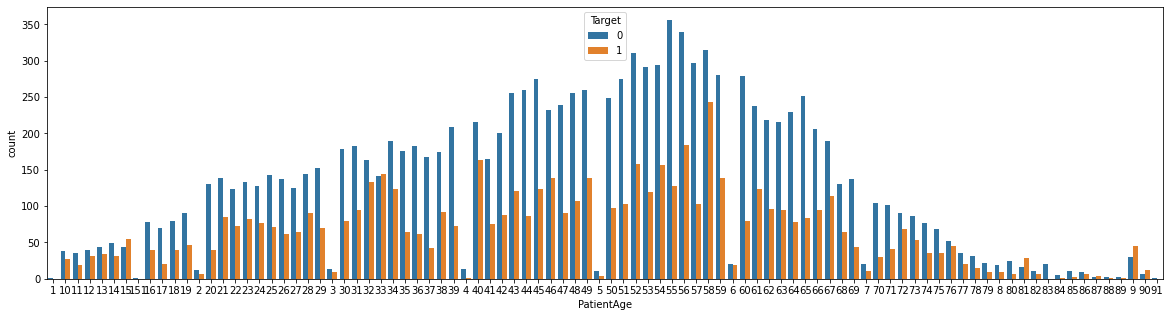

In [18]:
figure(figsize = (20, 5))
countplot(data = bal_train_df_2, x = 'PatientAge', hue = 'Target');

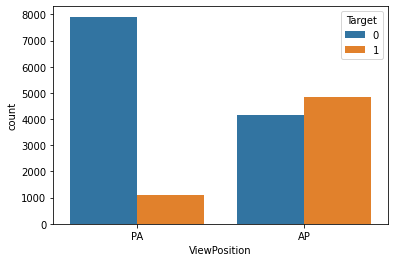

In [19]:
countplot(data = bal_train_df_2, x = 'ViewPosition', hue = 'Target');

In [20]:
bal_train_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     18000 non-null  object 
 1   x             5929 non-null   float64
 2   y             5929 non-null   float64
 3   width         5929 non-null   float64
 4   height        5929 non-null   float64
 5   Target        18000 non-null  int64  
 6   class         18000 non-null  object 
 7   PatientAge    18000 non-null  object 
 8   PatientSex    18000 non-null  object 
 9   ViewPosition  18000 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.4+ MB


Lets check the validation dataframe informations & distributions

In [21]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6046 entries, 35092 to 36704
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     6046 non-null   object 
 1   x             1911 non-null   float64
 2   y             1911 non-null   float64
 3   width         1911 non-null   float64
 4   height        1911 non-null   float64
 5   Target        6046 non-null   int64  
 6   class         6046 non-null   object 
 7   PatientAge    6046 non-null   object 
 8   PatientSex    6046 non-null   object 
 9   ViewPosition  6046 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 679.6+ KB


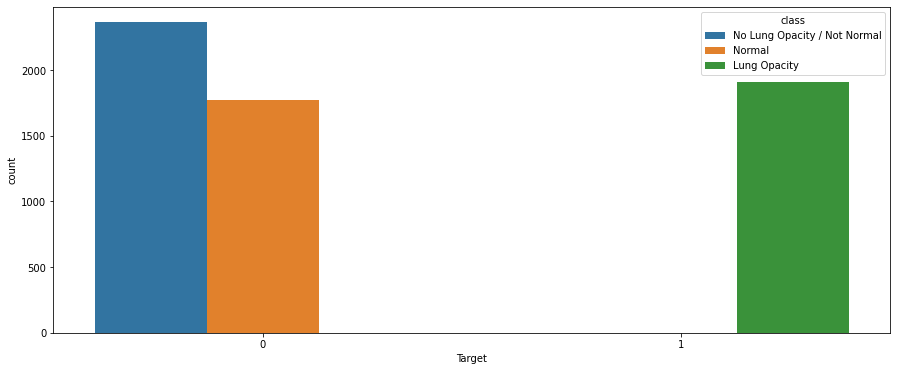

In [22]:
figure(figsize = (15, 6))
countplot(data=valid_df,x="Target", hue="class")
show()

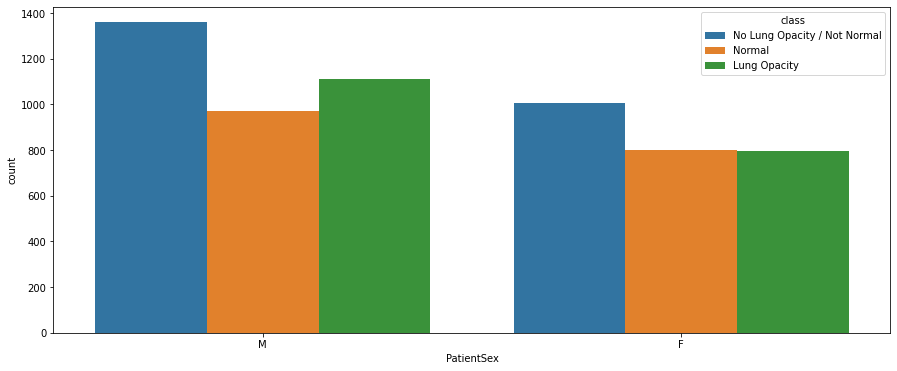

In [23]:
figure(figsize = (15, 6))
countplot(data=valid_df,x="PatientSex", hue="class")
show()

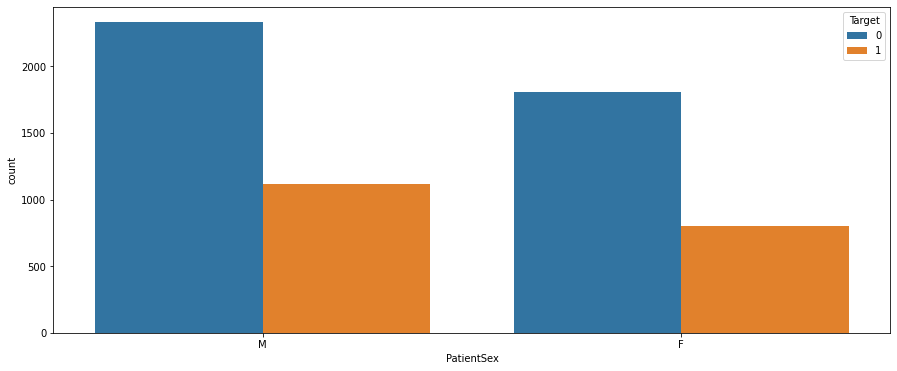

In [24]:
figure(figsize = (15, 6))
countplot(data=valid_df,x="PatientSex", hue="Target")
show()

#**Create Pickle files for Train & Validation datasets**

In [0]:
train_df_pick = "train_df_pickle"
valid_df_pick = "valid_df_pickle"

In [0]:
# open the file for writing
fileObject = open(train_df_pick,'wb') 
fileObject1 = open(valid_df_pick,'wb') 

pickle.dump(bal_train_df_2, fileObject) 
pickle.dump(valid_df, fileObject1)   

# here we close the fileObjects
fileObject.close()
fileObject1.close()

#**Note**:
From data preparation the balanced train and validation dataset has been created and can be used for Model building.